### Importing Libraries.

In [18]:
# Pandas: This librarie will used to create and work with dataframes.
import pandas as pd 
# Matplotlib: Used to plot graphics. 
import matplotlib.pyplot as plt
# Seaborn: Used to better style and iprove graphics. 
import seaborn as sns
#Tweepy: Used to work with the Twitter API.
import tweepy as tw
#ConfigParser: Used to get credentials for the twitter API.
import configparser as cp
#NLTK its used to pre-proccess text and regex its used to filter that text.
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()
#Library to count words
from collections import Counter
# library to bluid wordclouds
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/macbookair/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Importing and authenticating API credentials from the config file. 

In [3]:
config =  cp.ConfigParser()
config.read("config.ini")

api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

# Authentication

auth = tw.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

### Funtions to work with in this project.

In [20]:

# Function to perform data extraction from twitter.
def scrape(words, date_since, numtweet):
# We are using .Cursor() to search
# through twitter for the required tweets.
# The number of tweets can be
# restricted using .items(number of tweets)
    tweets = tw.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
# .Cursor() returns an iterable object. Each item in
# the iterator has various attributes
# that you can access to
# get information about each tweet
    list_tweets = [tweet for tweet in tweets]
 
# we will iterate over each tweet in the
# list for extracting information about each tweet
    columns=['tweet_date','tweets']
    data = []
    for tweet in list_tweets:
        tweet_date = tweet.created_at
# Retweets can be distinguished by
# a retweeted_status attribute,
# in case it is an invalid reference,
# except block will be executed
        try:
            tweets = tweet.retweeted_status.full_text
        except AttributeError:
            tweets = tweet.full_text
            data.append([tweet_date, tweets])
# Creating DataFrame using pandas
    df = pd.DataFrame(data, columns=columns)
    return df 

#Functions to preproccess text.
def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

def preprocess_text(text):
  cleaned = re.sub(r'(\W+)|(http\S+)', ' ', text).lower()
  tokenized = word_tokenize(cleaned)
  normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized if token not in stop_words]
  return normalized

# Funtion to bluid and plot a WordCloud.
def wordcloud(str):
    wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(str))
#plot the wordcloud object
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

### Getting the data from twitter.

In [12]:
tesla = scrape("Tesla", 2022-0o1-0o1, 20)
ford = scrape("Ford", 2022-0o1-0o1, 20)

,tweet_date,tweets
0,2022-03-24 23:39:12+00:00,@wendishen99 I wonder what year Ford goes bank...
1,2022-03-24 23:39:10+00:00,@ford_nik @Chakraborty_UNC Mine too. And hones...
2,2022-03-24 23:39:05+00:00,TOM FORD Made in Italy Reading Glasses L 1 - 1...
3,2022-03-24 23:39:05+00:00,Mirror Left / 17088482 For FORD Fiesta CE1 1.1...
4,2022-03-24 23:38:57+00:00,Ford stockholder benefit Well yes and no. It's...
5,2022-03-24 23:38:50+00:00,I am a visionary award winner because I have a...
6,2022-03-24 23:38:50+00:00,@TweeetLorraine It's an intentional mistake. F...
7,2022-03-24 23:38:49+00:00,Coach Calvin Ford and the rest !!\nRIZE PODCAS...
8,2022-03-24 23:38:43+00:00,@DonaldJTrumpJr None of these women are simila...
9,2022-03-24 23:38:41+00:00,@nishkidoonoo @WholeMarsBlog @elonmusk Ford wa...


### Preproccessing the data for further analisys.

In [14]:
tesla_preprocess = preprocess_text("".join(tesla.tweets))
ford_preprocess = preprocess_text("".join(ford.tweets))

### Counting words with bag of words

In [17]:
tesla_bow = Counter(tesla_preprocess)
ford_bow = Counter(ford_preprocess)

print("\nThen most frequent words and number of occurrences for Tesla according to Bag-of-Words:")
most_common_tesla = tesla_bow.most_common(10)
print(most_common_tesla)
print("\nTen most frequent words and number of occurrences for Ford according to Bag-of-Words:")
most_common_ford = ford_bow.most_common(10)
print(most_common_ford)


Then most frequent words and number of occurrences for Tesla according to Bag-of-Words:
[('tesla', 10), ('elonmusk', 5), ('split', 2), ('come', 2), ('app', 2), ('asml', 2), ('lithography', 2), ('machine', 2), ('use', 2), ('amp', 2)]

Ten most frequent words and number of occurrences for Ford according to Bag-of-Words:
[('ford', 8), ('1', 4), ('ebay', 2), ('mistake', 2), ('blasey', 2), ('wendishen99', 1), ('wonder', 1), ('year', 1), ('go', 1), ('bankrupt', 1)]


### Building a WordCloud

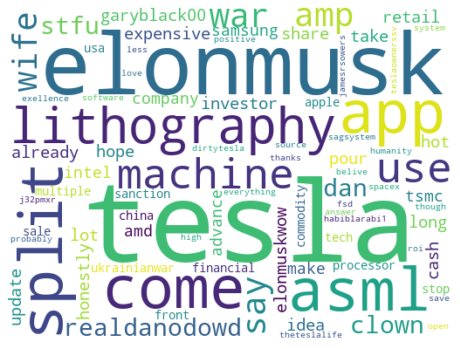

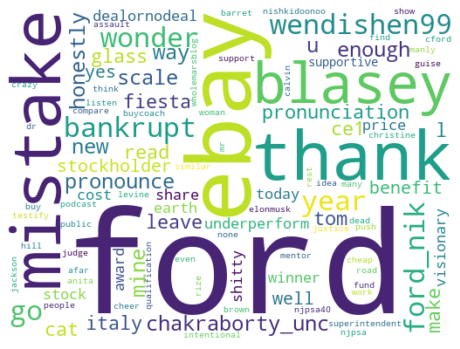

In [21]:
tesla_wordcloud = wordcloud(tesla_preprocess)
ford_wordcloud = wordcloud(ford_preprocess)